In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [106]:
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey (1).csv


In [107]:
df = pd.read_csv('survey.csv')
df.head(7)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [109]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [110]:
df['state'].value_counts(ascending=False)[:1]

,count
state,
CA,138


In [111]:
df['work_interfere'].value_counts(ascending=False)[:1]


,count
work_interfere,
Sometimes,465


In [112]:
df['self_employed'].value_counts()[:1]

,count
self_employed,
No,1095


In [113]:
df['state'].fillna('CA', inplace=True)
df['work_interfere'].fillna('Sometimes', inplace=True)
df['self_employed'].fillna('No', inplace=True)

In [114]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [115]:
df.drop(['comments'], axis=1, inplace=True)

In [116]:
df.head(7)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,CA,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,CA,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33,Male,United States,TN,No,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,2014-08-27 11:31:50,35,Female,United States,MI,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No


In [117]:
for col in df.iloc[:,2:].columns:
  print(col)
  print(df[col].value_counts())
  print('*'*120)

Gender
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter        

In [118]:

df['Gender'] = df['Gender'].replace('male', 'Male')
df['Gender'] = df['Gender'].replace('man', 'Male')
df['Gender'] = df['Gender'].replace('Man', 'Male')
df['Gender'] = df['Gender'].replace('m', 'Male')
df['Gender'] = df['Gender'].replace('M', 'Male')
df['Gender'] = df['Gender'].replace('female', 'Female')
df['Gender'] = df['Gender'].replace('Woman', 'Female')
df['Gender'] = df['Gender'].replace('woman', 'Female')
df['Gender'] = df['Gender'].replace('f', 'Female')
df['Gender'] = df['Gender'].replace('F', 'Female')



In [119]:
def gender_check(gender):
  if  gender == 'Female' or gender == 'Male':
    return gender
  else:
    return 'Other'

In [120]:
df['Gender'] = df['Gender'].apply(gender_check)

In [121]:
df['Gender'].value_counts()

,count
Gender,
Male,973
Female,240
Other,46


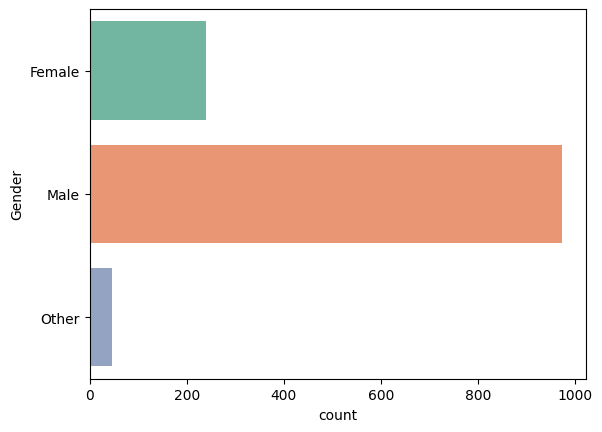

In [122]:
sns.countplot(df['Gender'], palette='Set2')

plt.show()

In [123]:
df['no_employees'].value_counts()

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,162
500-1000,60


In [124]:
df['no_employees'] = df['no_employees'].map({'1-5':1, '6-25':2, '26-100':3, '100-500':4, '500-1000':5, 'More than 1000':6})

In [125]:
df['no_employees'].value_counts()

,count
no_employees,
2,290
3,289
6,282
4,176
1,162
5,60


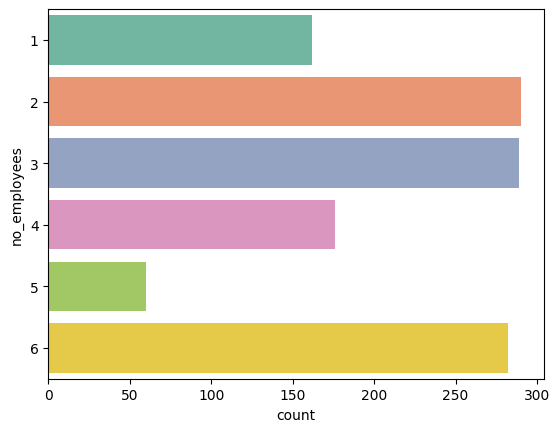

In [126]:
sns.countplot(df, y='no_employees', palette='Set2')

plt.show()

In [127]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [128]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [129]:
dummy_var = pd.get_dummies(df[cat_cols],dtype=int,drop_first=True)
dummy_var.head(7)

,Gender_Male,Gender_Other,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Czech Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Japan,Country_Latvia,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New Zealand,Country_Nigeria,Country_Norway,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Singapore,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Zimbabwe,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_NC,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,self_employed_Yes,family_history_Yes,treatment_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [130]:
X = dummy_var.drop(['treatment_Yes'], axis=1)
y= dummy_var['treatment_Yes']

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
def models(X_train, y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, y_train)

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)

  from sklearn.svm import SVC
  svc = SVC(kernel='linear', random_state=0)
  svc.fit(X_train, y_train)

  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  print('Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc.score(X_train, y_train))
  print('Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))

  return log, knn, svc, gauss

In [134]:
models = models(X_train, y_train)

Logistic Regression Training Accuracy: 0.7954319761668321
K Nearest Neighbor Training Accuracy: 0.759682224428997
Support Vector Machine (Linear Classifier) Training Accuracy: 0.8043694141012909
Naive Bayes Training Accuracy: 0.5700099304865939


In [135]:
from sklearn.metrics import confusion_matrix
for i in range(len(models)):
  cm = confusion_matrix(y_test, models[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(f'{models[i]}')
  print('Testing Accuracy is', (TP + TN) / (TP + TN + FN + FP))
  print()

LogisticRegression(random_state=0)
Testing Accuracy is 0.6865079365079365

KNeighborsClassifier()
Testing Accuracy is 0.5555555555555556

SVC(kernel='linear', random_state=0)
Testing Accuracy is 0.7222222222222222

GaussianNB()
Testing Accuracy is 0.48412698412698413



In [136]:
from sklearn.model_selection import cross_val_score

cv_score = []
for i in range(len(models)):
    cvs = cross_val_score(models[i], X, y, cv=5)
    cv_score.append(cvs.mean())
    print(f'{models[i]}')
    print(cvs)
    print(cvs.mean())
    print()


LogisticRegression(random_state=0)
[0.72222222 0.76190476 0.73015873 0.75       0.69322709]
0.7315025611838362

KNeighborsClassifier()
[0.69444444 0.62698413 0.60714286 0.6031746  0.65338645]
0.6370264971858597

SVC(kernel='linear', random_state=0)
[0.73015873 0.75793651 0.6984127  0.74603175 0.69322709]
0.7251533548346298

GaussianNB()
[0.51984127 0.53174603 0.54365079 0.51587302 0.50199203]
0.5226206285967242



In [137]:
models = pd.DataFrame(cv_score, index=models, columns=['Cross Validation Scores']).sort_values(by='Cross Validation Scores', ascending=False)
models

,Cross Validation Scores
LogisticRegression(random_state=0),0.731503
"SVC(kernel='linear', random_state=0)",0.725153
KNeighborsClassifier(),0.637026
GaussianNB(),0.522621
